# import pkgs

In [1]:
import pandas as pd
import glob
import matplotlib
import numpy as np
import imblearn
from sklearn import metrics
from matplotlib import pyplot as plt
# plt.rcParams['font.sans-serif']=['SimHei'] # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False # 用来正常显示负号
%matplotlib inline

In [8]:
gt = np.array([0,1,2,1,2,0])
pred = np.random.randn(6,3)
print(b)

gt_onehot = np.eye(3)[gt]
gt_onehot
i = 1
fpr,tpr,_ = metrics.roc_curve(gt_onehot[:,1],pred[:,1])
roc_auc = metrics.auc(fpr, tpr)
print(roc_auc)

[[-0.28388182  2.65401022  0.51531114]
 [ 0.52009078 -0.07916168  0.89229211]
 [ 0.28567399  1.8801233  -1.165384  ]
 [ 2.22430128  2.844397    0.81640326]
 [-1.76831885  0.1085918   0.42159217]
 [ 0.31211029 -1.01865743  0.41725842]]
0.25


# 数据集统计信息

In [28]:
import json
import pandas as pd

In [26]:
with open('CT_data.json', 'r') as f:
    d = json.load(f)

In [73]:
scan_info_list = []
for c in d:
    for pid in d[c]:
        for sid in d[c][pid]:
            num = len(d[c][pid][sid])
            scan_info_list.append(num)
df = pd.Series(scan_info_list)
df

0       285
1        42
2       290
3        37
4       269
       ... 
3988    202
3989     62
3990     63
3991     68
3992     60
Length: 3993, dtype: int64

Text(0, 0.5, 'frequency')

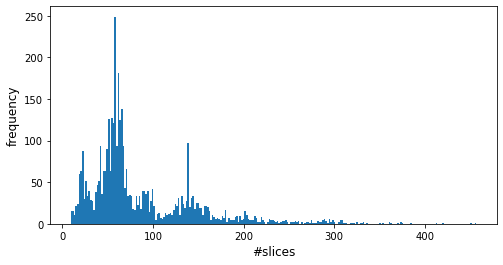

In [105]:
fig, ax = plt.subplots(figsize=(8,4))
plt.hist(x=scan_info_list, bins=250)
plt.xlabel('#slices', fontsize=12)
plt.ylabel('frequency', fontsize=12)

# plot learning curve (slice=64)

In [2]:
files = glob.glob('*/*/metrics.csv')
files

['densenet2d121_datas_img128_bs160_s64\\version_0\\metrics.csv',
 'densenet2d201_datas_img128_bs32_s64\\version_0\\metrics.csv',
 'densenet3d121_datas_img128_bs16_s64\\version_0\\metrics.csv',
 'densenet3d121_datas_img128_bs64_s64_nocolor\\version_0\\metrics.csv',
 'densenet3d121_datas_img128_bs64_s64_nocolor_mixup\\version_0\\metrics.csv',
 'mc3_18_datas_bs64_s128\\version_4\\metrics.csv',
 'mc3_18_datas_bs64_s32\\version_3\\metrics.csv',
 'mc3_18_datas_img128_bs128_s16\\version_0\\metrics.csv',
 'mc3_18_datas_img128_bs16_s256\\version_0\\metrics.csv',
 'mc3_18_datas_img128_bs64_s64_nocolor\\version_0\\metrics.csv',
 'mc3_18_datas_img128_bs64_s64_nocolor_mixup\\version_0\\metrics.csv',
 'mc3_18_datas_img128_bs8_s64\\version_0\\metrics.csv',
 'preact_resnet3d101_datas_img128_bs64_s64\\version_0\\metrics.csv',
 'pre_act_resnet101_3d_1ch\\version_4\\metrics.csv',
 'r2plus1d18_datas_img128_bs16_s64_nocolor_mixup\\version_0\\metrics.csv',
 'r2plus1d_18_datas_img128_bs16_s64_nocolor\\versio

In [3]:
len(files)

43

In [4]:
file64_3d = [
    'r2plus1d_18_datas_img128_bs8_s64\\version_0\\metrics.csv',
    'r3d_18_datas_img128_bs8_s64\\version_0\\metrics.csv',
    'mc3_18_datas_img128_bs8_s64\\version_0\\metrics.csv',
    'densenet3d121_datas_img128_bs16_s64\\version_0\\metrics.csv',
    'resnet3d101_datas_img128_bs16_s64\\version_0\\metrics.csv',
    'preact_resnet3d101_datas_img128_bs64_s64\\version_0\\metrics.csv',
    'resnext3d101_datas_img128_bs16_s64\\version_0\\metrics.csv'
]

In [5]:
df = pd.DataFrame()
for file in file64_3d:
    name  = file.split('_')[0]
    data = pd.read_csv(file)
    valid_acc = data['valid_acc_1']
    valid_acc = valid_acc[valid_acc>0]
    df[name] = valid_acc.values[:120]
df.tail()

,r2plus1d,r3d,mc3,densenet3d121,resnet3d101,preact,resnext3d101
115,71.375,78.750,78.000,83.875,81.500,82.932692,81.750
116,76.375,77.250,83.750,82.875,71.875,80.689103,80.750
117,75.625,77.125,71.125,85.500,82.000,83.814103,81.750
118,73.250,79.375,79.375,77.125,80.875,82.331731,82.125
119,77.500,82.625,79.250,81.250,82.250,81.009615,80.500


In [6]:
SMALL_SIZE = 14
MEDIUM_SIZE = 14
BIGGER_SIZE = 14

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

C:\Users\marsggbo\Anaconda3\envs\torchline\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  if sys.path[0] == '':


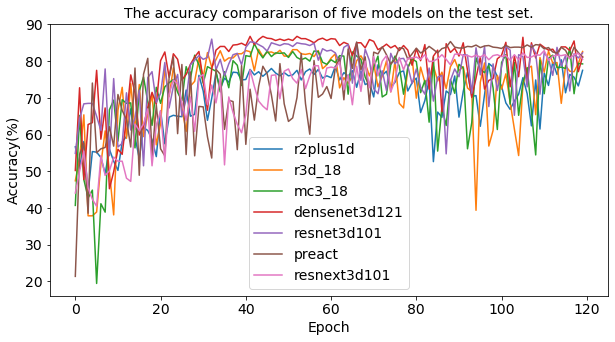

In [7]:
fig, ax = plt.subplots(1,figsize=(10,5))
indices = np.arange(120)
for idx in range(len(file64_3d)):
    d = df.values[:,idx]
    label = df.columns[idx]
    if label in ['mc3', 'r3d']: label+='_18'
    ax.plot(indices, d, label=label)
ax.set_xlabel('Epoch', )
ax.set_ylabel('Accuracy(%)', )
ax.set_title('The accuracy compararison of five models on the test set.')
ax.legend()
fig.show()

# Model comparison

In [5]:
files = glob.glob('*/*/predictions.npy')
files

['densenet2d121_datas_img128_bs160_s64\\version_0\\predictions.npy',
 'densenet2d201_datas_img128_bs32_s64\\version_0\\predictions.npy',
 'densenet3d121_datas_img128_bs128_s16_nocolor\\version_0\\predictions.npy',
 'densenet3d121_datas_img128_bs16_s64\\version_0\\predictions.npy',
 'densenet3d121_datas_img128_bs32_s128_nocolor\\version_0\\predictions.npy',
 'densenet3d121_datas_img128_bs64_s32_nocolor\\version_0\\predictions.npy',
 'densenet3d121_datas_img128_bs64_s64_nocolor\\version_0\\predictions.npy',
 'densenet3d121_datas_img128_bs64_s64_nocolor_mixup\\version_0\\predictions.npy',
 'mc3_18_datas_bs64_s128\\version_4\\predictions.npy',
 'mc3_18_datas_bs64_s32\\version_3\\predictions.npy',
 'mc3_18_datas_img128_bs128_s16\\version_0\\predictions.npy',
 'mc3_18_datas_img128_bs16_s256\\version_0\\predictions.npy',
 'mc3_18_datas_img128_bs64_s64_nocolor\\version_0\\predictions.npy',
 'mc3_18_datas_img128_bs64_s64_nocolor_mixup\\version_0\\predictions.npy',
 'mc3_18_datas_img128_bs8_s64\

In [126]:
file64_2d = [
    'densenet2d121_datas_img128_bs160_s64\\version_0\\predictions.npy',
 'densenet2d201_datas_img128_bs32_s64\\version_0\\predictions.npy',
 'resnext2d101_datas_img128_bs8_s64\\version_0\\predictions.npy',
 'resnet2d101_datas_img128_bs128_s64\\version_0\\predictions.npy',
 'resnet2d50_datas_img128_bs64_s64\\version_0\\predictions.npy',
]

In [88]:
file64_3d = [
    'r2plus1d_18_datas_img128_bs8_s64\\version_0\\predictions.npy',
    
    'r3d_18_datas_img128_bs8_s64\\version_0\\predictions.npy',

    'mc3_18_datas_img128_bs8_s64\\version_0\\predictions.npy',
    
    'densenet3d121_datas_img128_bs16_s64\\version_0\\predictions.npy',
    
    'resnet3d101_datas_img128_bs16_s64\\version_0\\predictions.npy',
    
    'preact_resnet3d101_datas_img128_bs64_s64\\version_0\\predictions.npy',
    
    'resnext3d101_datas_img128_bs16_s64\\version_0\\predictions.npy',
]

In [89]:
file64_1d = [
    'r2plus1d_18_datas_img128_bs16_s64_nocolor\\version_0\\predictions.npy',
    
 'resnet3d18_datas_img128_bs64_s64_nocolor\\version_1\\predictions.npy',

 'mc3_18_datas_img128_bs64_s64_nocolor\\version_0\\predictions.npy',
    
 'densenet3d121_datas_img128_bs64_s64_nocolor\\version_0\\predictions.npy',
    
 'resnet3d101_datas_img128_bs16_s64_nocolor\\version_0\\predictions.npy',
    
 'pre_act_resnet101_3d_1ch\\version_4\\predictions.npy',
    
 'resnext101_3d_1ch_s64\\version_0\\predictions.npy',
]

## plot confusion matrix

In [10]:
from sklearn import metrics
# import seaborn as sn
import matplotlib.cm as cm
import imblearn

In [27]:
files = glob.glob("*/*/predictions.npy")
files

['densenet2d121_datas_img128_bs160_s64\\version_0\\predictions.npy',
 'densenet2d201_datas_img128_bs32_s64\\version_0\\predictions.npy',
 'densenet3d121_datas_img128_bs16_s64\\version_0\\predictions.npy',
 'densenet3d121_datas_img128_bs64_s64_nocolor\\version_0\\predictions.npy',
 'densenet3d121_datas_img128_bs64_s64_nocolor_mixup\\version_0\\predictions.npy',
 'mc3_18_datas_bs64_s128\\version_4\\predictions.npy',
 'mc3_18_datas_bs64_s32\\version_3\\predictions.npy',
 'mc3_18_datas_img128_bs128_s16\\version_0\\predictions.npy',
 'mc3_18_datas_img128_bs16_s256\\version_0\\predictions.npy',
 'mc3_18_datas_img128_bs64_s64_nocolor\\version_0\\predictions.npy',
 'mc3_18_datas_img128_bs64_s64_nocolor_mixup\\version_0\\predictions.npy',
 'mc3_18_datas_img128_bs8_s64\\version_0\\predictions.npy',
 'preact_resnet3d101_datas_img128_bs64_s64\\version_0\\predictions.npy',
 'pre_act_resnet101_3d_1ch\\version_4\\predictions.npy',
 'r2plus1d18_datas_img128_bs16_s64_nocolor_mixup\\version_0\\predictio

In [12]:
gt = np.load('./mc3_18_datas_img128_bs8_s64/version_0/gt_labels.npy')

In [23]:
preds = {}
for file in files:
    name = file.split('_')[0]
    if name in ['mc3','r3d']: name += '_18'
    key = file.split('\\')[0]
    pred = np.load(file)
    preds[key] = pred
    
    print(f"====={key}======")
    print(imblearn.metrics.classification_report_imbalanced(gt, pred.argmax(1), digits=4))
#     print(metrics.classification_report(gt,preds[key].argmax(1),digits=4))
#     print("specificity",imblearn.metrics.sensitivity_specificity_support(gt, pred.argmax(1))[1])

=====densenet2d121_datas_img128_bs160_s64======
                   pre       rec       spe        f1       geo       iba       sup

          0     0.8160    0.7756    0.8929    0.7953    0.8322    0.6844       303
          1     0.8506    0.7351    0.9214    0.7886    0.8230    0.6647       302
          2     0.7108    0.9171    0.8810    0.8009    0.8989    0.8109       193

avg / total     0.8036    0.7945    0.9008    0.7941    0.8448    0.7075       798

=====densenet2d201_datas_img128_bs32_s64======
                   pre       rec       spe        f1       geo       iba       sup

          0     0.8659    0.7459    0.9293    0.8014    0.8325    0.6804       303
          1     0.7898    0.8212    0.8669    0.8052    0.8438    0.7087       302
          2     0.7982    0.9223    0.9256    0.8558    0.9239    0.8534       193

avg / total     0.8207    0.8170    0.9048    0.8160    0.8589    0.7329       798

=====densenet3d121_datas_img128_bs128_s16_nocolor======
             

=====resnet2d101_datas_img128_bs128_s64======
                   pre       rec       spe        f1       geo       iba       sup

          0     0.8134    0.7624    0.8929    0.7871    0.8251    0.6719       303
          1     0.7835    0.7550    0.8730    0.7690    0.8118    0.6513       302
          2     0.7399    0.8549    0.9041    0.7933    0.8792    0.7692       193

avg / total     0.7843    0.7820    0.8881    0.7817    0.8331    0.6876       798

=====resnet2d50_datas_img128_bs64_s64======
                   pre       rec       spe        f1       geo       iba       sup

          0     0.8083    0.7096    0.8970    0.7557    0.7978    0.6245       303
          1     0.7362    0.7483    0.8367    0.7422    0.7913    0.6206       302
          2     0.7333    0.8549    0.9008    0.7895    0.8776    0.7666       193

avg / total     0.7629    0.7594    0.8751    0.7588    0.8146    0.6574       798

=====resnet34_3d_1ch======
                   pre       rec       spe     


=====resnext3d101_datas_img128_bs16_s64======
                   pre       rec       spe        f1       geo       iba       sup

          0     0.8373    0.8152    0.9030    0.8261    0.8580    0.7297       303
          1     0.8500    0.7881    0.9153    0.8179    0.8493    0.7122       302
          2     0.7892    0.9119    0.9223    0.8462    0.9171    0.8402       193

avg / total     0.8305    0.8283    0.9123    0.8278    0.8690    0.7498       798



In [25]:
print(imblearn.metrics.classification_report_imbalanced(gt, pred.argmax(1), digits=4))

                   pre       rec       spe        f1       geo       iba       sup

          0     0.8373    0.8152    0.9030    0.8261    0.8580    0.7297       303
          1     0.8500    0.7881    0.9153    0.8179    0.8493    0.7122       302
          2     0.7892    0.9119    0.9223    0.8462    0.9171    0.8402       193

avg / total     0.8305    0.8283    0.9123    0.8278    0.8690    0.7498       798



In [56]:
def plot_confusion_matrix(numx, numy, gt, preds, size_scale=5, fontsize=14):
    figsize = (numy*size_scale,numx*size_scale)
    if numy==1:
        fig,axes = plt.subplots(numx,figsize=figsize)
    else:
        fig,axes = plt.subplots(numx, numy, figsize=figsize)
    for idx, name in enumerate(preds):
        ax = axes[idx]
        pred = preds[name]
        cfm = metrics.confusion_matrix(gt, pred.argmax(1))
        h,w=cfm.shape
        ax.set_aspect(1)
        im = ax.imshow(cfm,cmap='Oranges')
        cbar = ax.figure.colorbar(im, ax=ax)
        cbar.ax.set_ylabel('', rotation=-90, va="bottom")
        ax.set_title(name,fontdict={'fontsize':fontsize})
        ax.set_xticks(np.arange(3))
        ax.set_yticks(np.arange(3))
        ax.set_xticklabels(['CP', 'NCP', 'Normal'],fontsize=fontsize-2)
        ax.set_yticklabels(['CP', 'NCP', 'Normal'],fontsize=fontsize-2)
        for i in range(h):
            for j in range(w):
                ax.text(j,i,cfm[i,j],ha='center',va='center',color='black',fontsize=fontsize)

    # fig.tight_layout()
    fig.show()
    axes

In [57]:
len(preds)

41

C:\Users\marsggbo\Anaconda3\envs\torchline\lib\site-packages\ipykernel_launcher.py:26: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


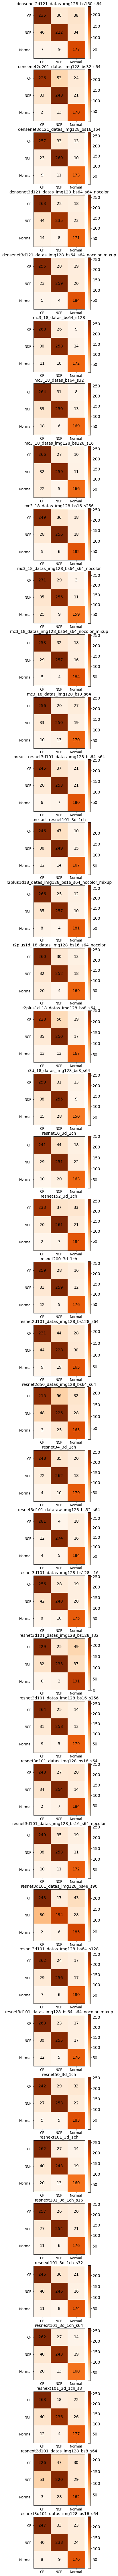

In [58]:
plot_confusion_matrix(41,1, gt, preds,4)

## plot roc curve

In [30]:
from sklearn import metrics
# import seaborn as sn
import matplotlib.cm as cm

In [38]:
files = glob.glob("*/*/predictions.npy")
files

['densenet2d121_datas_img128_bs160_s64\\version_0\\predictions.npy',
 'densenet2d201_datas_img128_bs32_s64\\version_0\\predictions.npy',
 'densenet3d121_datas_img128_bs16_s64\\version_0\\predictions.npy',
 'densenet3d121_datas_img128_bs64_s64_nocolor\\version_0\\predictions.npy',
 'densenet3d121_datas_img128_bs64_s64_nocolor_mixup\\version_0\\predictions.npy',
 'mc3_18_datas_bs64_s128\\version_4\\predictions.npy',
 'mc3_18_datas_bs64_s32\\version_3\\predictions.npy',
 'mc3_18_datas_img128_bs128_s16\\version_0\\predictions.npy',
 'mc3_18_datas_img128_bs16_s256\\version_0\\predictions.npy',
 'mc3_18_datas_img128_bs64_s64_nocolor\\version_0\\predictions.npy',
 'mc3_18_datas_img128_bs64_s64_nocolor_mixup\\version_0\\predictions.npy',
 'mc3_18_datas_img128_bs8_s64\\version_0\\predictions.npy',
 'preact_resnet3d101_datas_img128_bs64_s64\\version_0\\predictions.npy',
 'pre_act_resnet101_3d_1ch\\version_4\\predictions.npy',
 'r2plus1d18_datas_img128_bs16_s64_nocolor_mixup\\version_0\\predictio

In [3]:
gt = np.load('./mc3_18_datas_img128_bs8_s64/version_0/gt_labels.npy')

In [127]:
preds_3d = {}
for file in file64_3d:
    name = file.split('\\')[0]
#     if name in ['mc3','r3d']: name += '_18'
    preds_3d[name] = np.load(file)

preds_1d = {}
for file in file64_1d:
    name = file.split('\\')[0]
#     if name in ['mc3','r3d']: name += '_18'
    preds_1d[name] = np.load(file)

preds_2d = {}
for file in file64_2d:
    name = file.split('\\')[0]
#     if name in ['mc3','r3d']: name += '_18'
    preds_2d[name] = np.load(file)

In [54]:
def plot_one_model_roc(gt, pred,name):
    fpr = {}
    tpr = {}
    roc_auc = {}
    gt_onehot = np.eye(3)[gt]
    gt_onehot
    for i in range(3):
        fpr[i],tpr[i],_ = metrics.roc_curve(gt_onehot[:,i],pred[:,i])
        roc_auc[i] = metrics.auc(fpr[i], tpr[i])

    cls_map = {'0':'CP','1':'NCP','2':'Normal'}
    for i in range(3):
        plt.plot(fpr[i], tpr[i], label=f"ROC curve of class {cls_map[str(i)]} (area={roc_auc[i]:.2f})")
    plt.plot([0, 1], [0, 1], 'k--')
    # plt.grid()
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver operating characteristic to {name}')
    plt.legend(loc="lower right")
    # plt.tight_layout()
    plt.show()

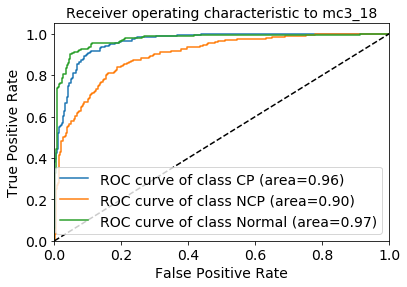

In [91]:
plot_one_model_roc(gt, preds['densenet3d121_datas_img128_bs16_s64'], 'mc3_18')

In [151]:
def plot_models_in_one_roc(gt, preds, title='', size_scale=5, fontsize=14):
    figsize = (1*size_scale,1*size_scale)
    fig, axes = plt.subplots(1,figsize=figsize)
    ax = axes
    fpr = {}
    tpr = {}
    roc_auc = {}
    gt_onehot = np.eye(3)[gt]
    for idx in range(len(preds)):
        name = list(preds.keys())[idx]
        pred = preds[name]
        for i in range(3):
            fpr[i],tpr[i],_ = metrics.roc_curve(gt_onehot[:,i],pred[:,i])
            roc_auc[i] = metrics.auc(fpr[i], tpr[i])

        cls_map = {'0':'CP','1':'NCP','2':'Normal'}
        i=1
        name = name.split('_')[0]
        if name.startswith('mc3'):
            name = 'mc3_18'
        elif name.startswith('pre'):
            name = 'preact_resnet3d101'
        elif name=='r3d':
            name = 'resnet3d18'
        ax.plot(fpr[i], tpr[i], label=f"{name} area={roc_auc[i]:.3f}")
#         ax.plot(fpr[i], tpr[i], label=f"ROC curve of  {name} (area={roc_auc[i]:.2f})")
        ax.plot([0, 1], [0, 1], 'k--')
        # plt.grid()
        ax.set_xlim([0.0, 1.0])
        ax.set_ylim([0.0, 1.05])
        ax.set_xlabel('False Positive Rate')
        ax.set_ylabel('True Positive Rate')
        ax.legend(loc=(0.43,0.02))
        # plt.tight_layout()
    if title:
        ax.set_title(title)
    plt.show()

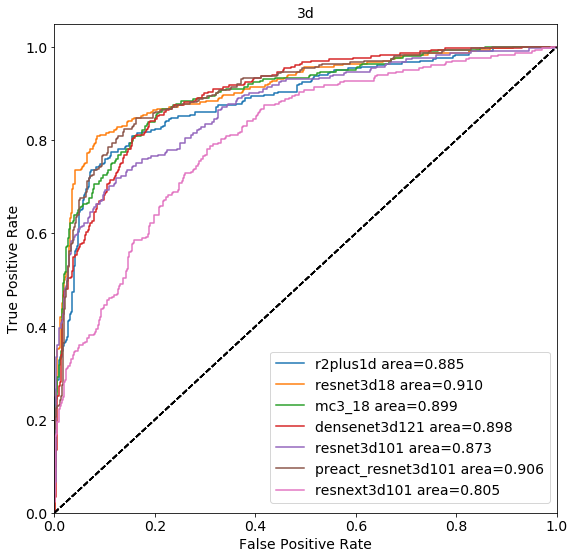

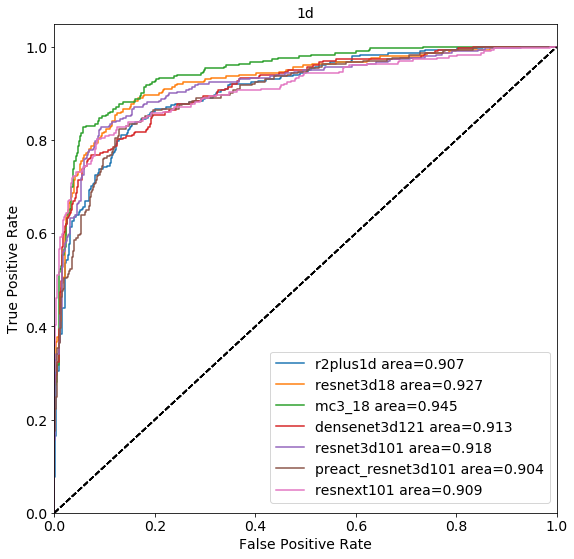

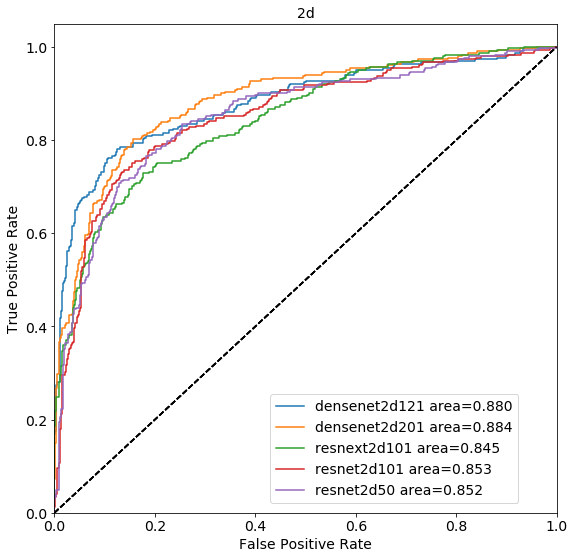

In [153]:
temp_3d = {**preds_3d, **preds_2d}
# plot_models_in_one_roc(gt,temp_3d,9)
plot_models_in_one_roc(gt,preds_3d,'3d',9)
plot_models_in_one_roc(gt,preds_1d,'1d',9)
plot_models_in_one_roc(gt,preds_2d, '2d', 9)

In [152]:
def plot_models_roc(numx, numy, gt, preds, size_scale=5, fontsize=14):
    figsize = (numy*size_scale,numx*size_scale)
    fig, axes = plt.subplots(numx,numy,figsize=figsize)
    for m in range(numx):
        for n in range(numy):
            ax = axes[m][n]
            fpr = {}
            tpr = {}
            roc_auc = {}
            gt_onehot = np.eye(3)[gt]
            idx = (m)*numy + n
            name = list(preds.keys())[idx]
            pred = preds[name]
            for i in range(3):
                fpr[i],tpr[i],_ = metrics.roc_curve(gt_onehot[:,i],pred[:,i])
                roc_auc[i] = metrics.auc(fpr[i], tpr[i])

            cls_map = {'0':'CP','1':'NCP','2':'Normal'}
            for i in range(3):
                ax.plot(fpr[i], tpr[i], label=f"ROC curve of class {cls_map[str(i)]} (area={roc_auc[i]:.2f})")
            ax.plot([0, 1], [0, 1], 'k--')
            # plt.grid()
            ax.set_xlim([0.0, 1.0])
            ax.set_ylim([0.0, 1.05])
            ax.set_xlabel('False Positive Rate')
            ax.set_ylabel('True Positive Rate')
            ax.set_title(f'Receiver operating characteristic to {name}')
            ax.legend(loc="lower right")
            # plt.tight_layout()
    plt.show()

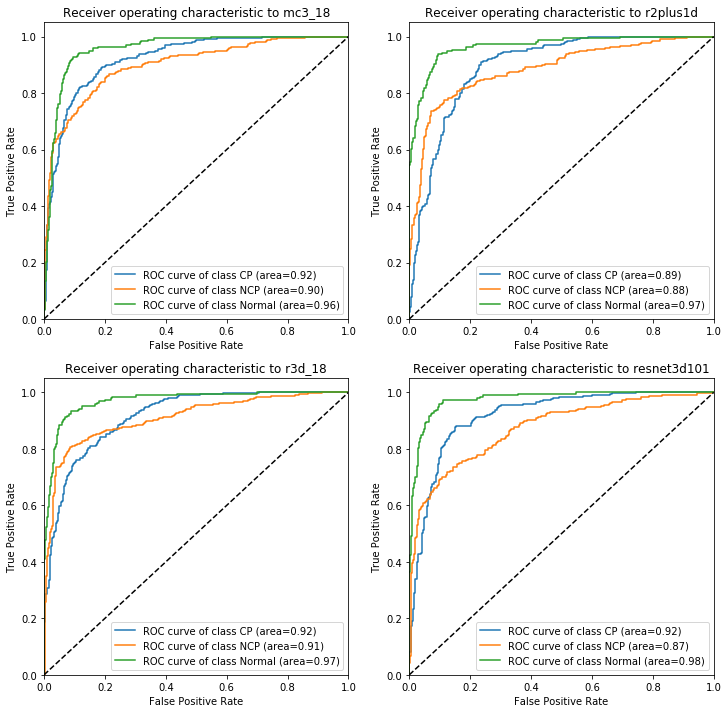

In [155]:
plot_models_roc(2,2,gt,preds,6)

# resnet resies

In [235]:
def plot_res_in_one_roc(gt, preds, title='', size_scale=5, fontsize=14):
    figsize = (1*size_scale,1*size_scale)
    fig, axes = plt.subplots(1,figsize=figsize)
    ax = axes
    fpr = {}
    tpr = {}
    roc_auc = {}
    gt_onehot = np.eye(3)[gt]
    for idx in range(len(preds)):
        fullname = list(preds.keys())[idx]
        pred = preds[fullname]
        for i in range(3):
            fpr[i],tpr[i],_ = metrics.roc_curve(gt_onehot[:,i],pred[:,i])
            roc_auc[i] = metrics.auc(fpr[i], tpr[i])

        cls_map = {'0':'CP','1':'NCP','2':'Normal'}
        i=1
        name = fullname.split('_')[0]
        if name not in ['resnet3d18', 'resnet3d101']:
            name = name.replace('resnet', 'resnet3d')
        n_slice = fullname.split('_')[-1].replace('s','slice=')
        ax.plot(fpr[i], tpr[i], label=f"{name} area={roc_auc[i]:.3f}")
#         ax.plot(fpr[i], tpr[i], label=f"ROC curve of  {name} (area={roc_auc[i]:.2f})")
        ax.plot([0, 1], [0, 1], 'k--')
        # plt.grid()
        ax.set_xlim([0.0, 1.0])
        ax.set_ylim([0.0, 1.05])
        ax.set_xlabel('False Positive Rate')
        ax.set_ylabel('True Positive Rate')
        ax.legend(loc=(0.43,0.02))
        # plt.tight_layout()
#         ax.set_title(name)
    plt.show()
    print(name)

In [232]:
res_series_slices = [
 'resnet10_3d_1ch\\version_6\\predictions.npy',
 'resnet3d18_datas_img128_bs64_s64_nocolor\\version_1\\predictions.npy',
 'resnet34_3d_1ch\\version_4\\predictions.npy',
 'resnet50_3d_1ch\\version_3\\predictions.npy',
 'resnet3d101_datas_img128_bs16_s64_nocolor\\version_0\\predictions.npy',
 'resnet152_3d_1ch\\version_1\\predictions.npy',
 'resnet200_3d_1ch\\version_0\\predictions.npy',
]

In [233]:

preds_res_series = {}
for file in res_series_slices:
    name = file.split('\\')[0]
    preds_res_series[name] = np.load(file)

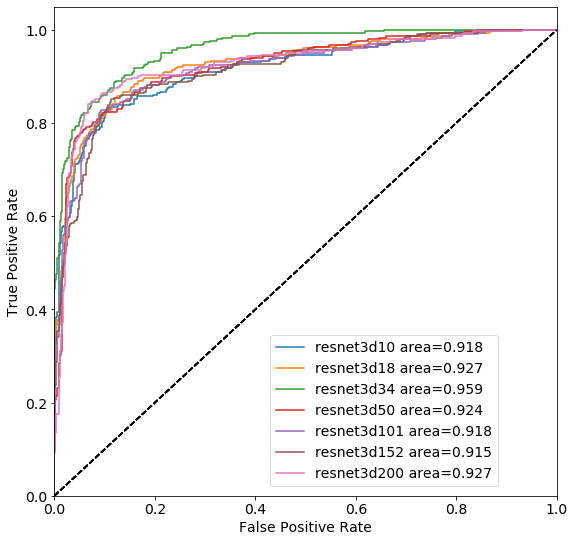

resnet3d200


In [236]:

plot_res_in_one_roc(gt,preds_res_series, 'res series', 9)

# Slice Comparison

In [17]:
files = glob.glob('*/*/predictions.npy')
files

['densenet2d121_datas_img128_bs160_s64\\version_0\\predictions.npy',
 'densenet2d201_datas_img128_bs32_s64\\version_0\\predictions.npy',
 'densenet3d121_datas_img128_bs128_s16_nocolor\\version_0\\predictions.npy',
 'densenet3d121_datas_img128_bs16_s256_nocolor\\version_0\\predictions.npy',
 'densenet3d121_datas_img128_bs16_s64\\version_0\\predictions.npy',
 'densenet3d121_datas_img128_bs32_s128_nocolor\\version_0\\predictions.npy',
 'densenet3d121_datas_img128_bs64_s32_nocolor\\version_0\\predictions.npy',
 'densenet3d121_datas_img128_bs64_s64_nocolor\\version_0\\predictions.npy',
 'densenet3d121_datas_img128_bs64_s64_nocolor_mixup\\version_0\\predictions.npy',
 'mc3_18_datas_bs64_s128\\version_4\\predictions.npy',
 'mc3_18_datas_bs64_s32\\version_3\\predictions.npy',
 'mc3_18_datas_img128_bs128_s16\\version_0\\predictions.npy',
 'mc3_18_datas_img128_bs16_s256\\version_0\\predictions.npy',
 'mc3_18_datas_img128_bs64_s64_nocolor\\version_0\\predictions.npy',
 'mc3_18_datas_img128_bs64_s

In [13]:
def plot_slices_in_one_roc(gt, preds, title='', size_scale=5, fontsize=14):
    figsize = (1*size_scale,1*size_scale)
    fig, axes = plt.subplots(1,figsize=figsize)
    ax = axes
    fpr = {}
    tpr = {}
    roc_auc = {}
    gt_onehot = np.eye(3)[gt]
    for idx in range(len(preds)):
        fullname = list(preds.keys())[idx]
        pred = preds[fullname]
        for i in range(3):
            fpr[i],tpr[i],_ = metrics.roc_curve(gt_onehot[:,i],pred[:,i])
            roc_auc[i] = metrics.auc(fpr[i], tpr[i])

        cls_map = {'0':'CP','1':'NCP','2':'Normal'}
        i=1
        name = fullname.split('_')[0]
        if name.startswith('mc3'):
            name = 'mc3_18 '
        elif name.startswith('resnext'):
            name = 'resnext3d101 '
        elif name.startswith('res'):
            name = 'resnet3d101 '
        n_slice = fullname.replace('_nocolor', '').split('_')[-1].replace('s','slice=')
        ax.plot(fpr[i], tpr[i], label=f"{n_slice} area={roc_auc[i]:.3f}")
#         ax.plot(fpr[i], tpr[i], label=f"ROC curve of  {name} (area={roc_auc[i]:.2f})")
        ax.plot([0, 1], [0, 1], 'k--')
        # plt.grid()
        ax.set_xlim([0.0, 1.0])
        ax.set_ylim([0.0, 1.05])
        ax.set_xlabel('False Positive Rate')
        ax.set_ylabel('True Positive Rate')
        ax.legend(loc=(0.43,0.02))
        # plt.tight_layout()
#         ax.set_title(name)
    plt.show()
    print(name)

In [18]:
mc_slices = [
 'mc3_18_datas_img128_bs128_s16\\version_0\\predictions.npy',
 'mc3_18_datas_bs64_s32\\version_3\\predictions.npy',
 'mc3_18_datas_img128_bs8_s64\\version_0\\predictions.npy',
 'mc3_18_datas_bs64_s128\\version_4\\predictions.npy',
 'mc3_18_datas_img128_bs16_s256\\version_0\\predictions.npy',
]
res_slices = [
 'resnet3d101_datas_img128_bs128_s16\\version_0\\predictions.npy',
 'resnet3d101_datas_img128_bs128_s32\\version_0\\predictions.npy',
 'resnet3d101_datas_img128_bs16_s64\\version_0\\predictions.npy',
 'resnet3d101_datas_img128_bs64_s128\\version_0\\predictions.npy',
 'resnet3d101_datas_img128_bs16_s256\\version_0\\predictions.npy',
]
resnext_slcies = [
#  'resnext101_3d_1ch\\version_0\\predictions.npy',
 'resnext101_3d_1ch_s16\\version_4\\predictions.npy',
 'resnext101_3d_1ch_s32\\version_2\\predictions.npy',
 'resnext101_3d_1ch_s64\\version_0\\predictions.npy',
 'resnext101_3d_1ch_s8\\version_6\\predictions.npy',
]
dense_slices = [
    'densenet3d121_datas_img128_bs128_s16_nocolor\\version_0\\predictions.npy',
    'densenet3d121_datas_img128_bs64_s32_nocolor\\version_0\\predictions.npy',
    'densenet3d121_datas_img128_bs64_s64_nocolor\\version_0\\predictions.npy',
    'densenet3d121_datas_img128_bs32_s128_nocolor\\version_0\\predictions.npy',
    'densenet3d121_datas_img128_bs16_s256_nocolor\\version_0\\predictions.npy',
]

In [19]:

preds_mc = {}
for file in mc_slices:
    name = file.split('\\')[0]
    preds_mc[name] = np.load(file)


preds_res = {}
for file in res_slices:
    name = file.split('\\')[0]
    preds_res[name] = np.load(file)

preds_resnext = {}
for file in resnext_slcies:
    name = file.split('\\')[0]
    preds_resnext[name] = np.load(file)

preds_dense = {}
for file in dense_slices:
    name = file.split('\\')[0]
    preds_dense[name] = np.load(file)

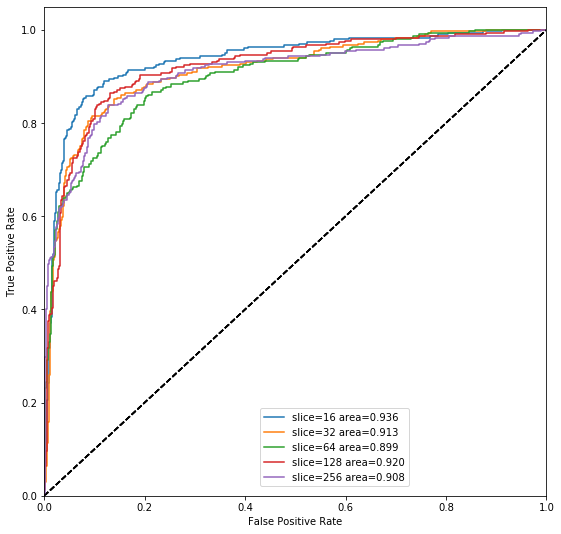

mc3_18 


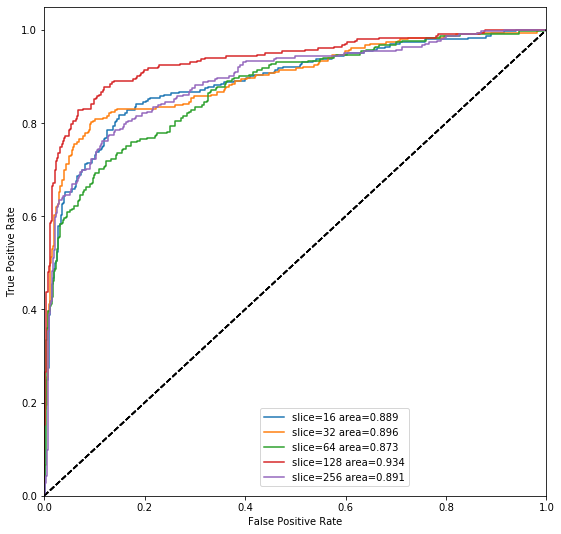

resnet3d101 


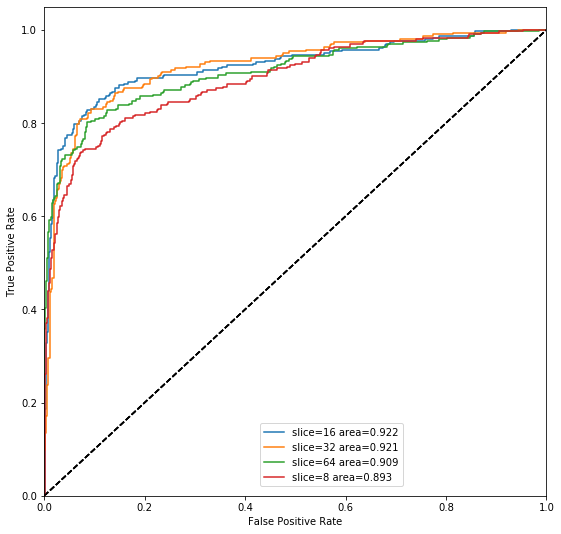

resnext3d101 


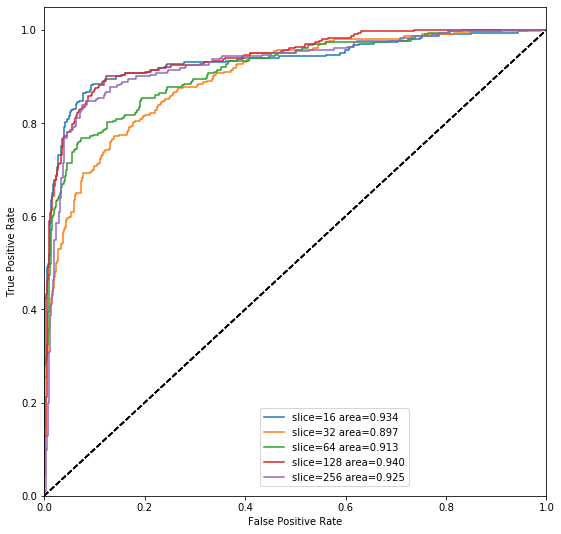

densenet3d121


In [20]:

plot_slices_in_one_roc(gt,preds_mc, 'mc slices', 9)
plot_slices_in_one_roc(gt,preds_res, 'res_slices', 9)
plot_slices_in_one_roc(gt,preds_resnext, 'resnext_slices', 9)
plot_slices_in_one_roc(gt,preds_dense, 'dense_slices', 9)

# mixup

In [17]:
def plot_mixup_in_one_roc(gt, preds, title='', size_scale=5, fontsize=14):
    figsize = (1*size_scale,1*size_scale)
    fig, axes = plt.subplots(1,figsize=figsize)
    ax = axes
    fpr = {}
    tpr = {}
    roc_auc = {}
    gt_onehot = np.eye(3)[gt]
    for idx in range(len(preds)):
        fullname = list(preds.keys())[idx]
        pred = preds[fullname]
        for i in range(3):
            fpr[i],tpr[i],_ = metrics.roc_curve(gt_onehot[:,i],pred[:,i])
            roc_auc[i] = metrics.auc(fpr[i], tpr[i])

        cls_map = {'0':'CP','1':'NCP','2':'Normal'}
        i=1
        if 'mixup' in fullname:
            name = 'mixup'
        else:
            name = 'w/o mixup'
        n_slice = fullname.split('_')[-1].replace('s','slice=')
        ax.plot(fpr[i], tpr[i], label=f"{name} area={roc_auc[i]:.3f}")
#         ax.plot(fpr[i], tpr[i], label=f"ROC curve of  {name} (area={roc_auc[i]:.2f})")
        ax.plot([0, 1], [0, 1], 'k--')
        # plt.grid()
        ax.set_xlim([0.0, 1.0])
        ax.set_ylim([0.0, 1.05])
        ax.set_xlabel('False Positive Rate')
        ax.set_ylabel('True Positive Rate')
        ax.legend(loc=(0.6,0.02))
        # plt.tight_layout()
#         ax.set_title(name)
    plt.show()
    print(fullname)

In [6]:
dense_mixup = [
 'densenet3d121_datas_img128_bs64_s64_nocolor\\version_0\\predictions.npy',
 'densenet3d121_datas_img128_bs64_s64_nocolor_mixup\\version_0\\predictions.npy',
]

mc_mixup = [
 'mc3_18_datas_img128_bs64_s64_nocolor\\version_0\\predictions.npy',
 'mc3_18_datas_img128_bs64_s64_nocolor_mixup\\version_0\\predictions.npy',
]

res18_mixup = [
 'resnet3d18_datas_img128_bs64_s64_nocolor\\version_1\\predictions.npy',
 'resnet3d18_datas_img128_bs64_s64_nocolor_mixup\\version_1\\predictions.npy',
]

res101_mixup = [
 'resnet3d101_datas_img128_bs16_s64_nocolor\\version_0\\predictions.npy',
 'resnet3d101_datas_img128_bs64_s64_nocolor_mixup\\version_0\\predictions.npy',
]

r2_mixup = [
 'r2plus1d_18_datas_img128_bs16_s64_nocolor\\version_0\\predictions.npy',
 'r2plus1d18_datas_img128_bs16_s64_nocolor_mixup\\version_0\\predictions.npy',
]

In [7]:
preds_dense_mixup = {}
for file in dense_mixup:
    name = file.split('\\')[0]
    preds_dense_mixup[name] = np.load(file)

preds_mc_mixup = {}
for file in mc_mixup:
    name = file.split('\\')[0]
    preds_mc_mixup[name] = np.load(file)

preds_res18_mixup = {}
for file in res18_mixup:
    name = file.split('\\')[0]
    preds_res18_mixup[name] = np.load(file)

preds_res101_mixup = {}
for file in res101_mixup:
    name = file.split('\\')[0]
    preds_res101_mixup[name] = np.load(file)

preds_r2_mixup = {}
for file in r2_mixup:
    name = file.split('\\')[0]
    preds_r2_mixup[name] = np.load(file)

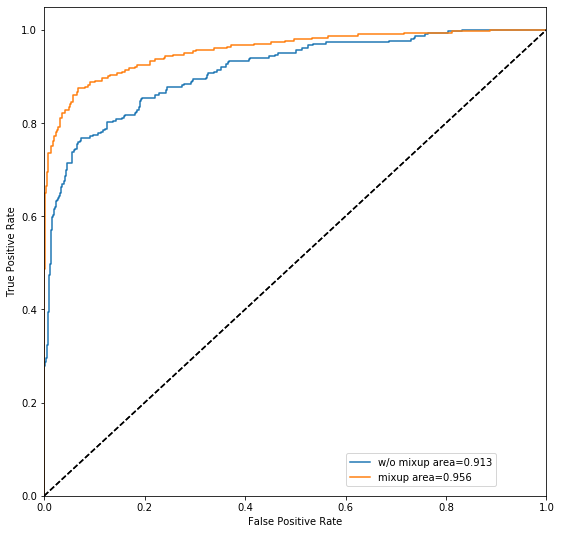

densenet3d121_datas_img128_bs64_s64_nocolor_mixup


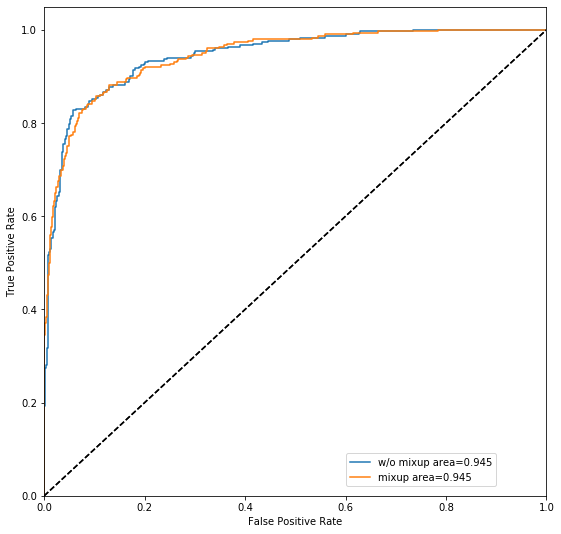

mc3_18_datas_img128_bs64_s64_nocolor_mixup


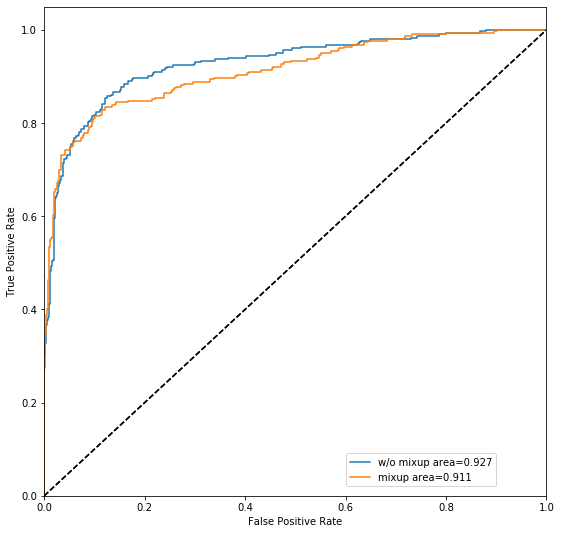

resnet3d18_datas_img128_bs64_s64_nocolor_mixup


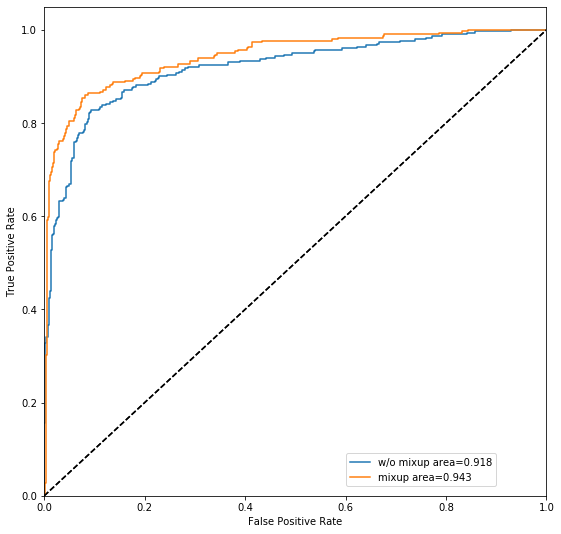

resnet3d101_datas_img128_bs64_s64_nocolor_mixup


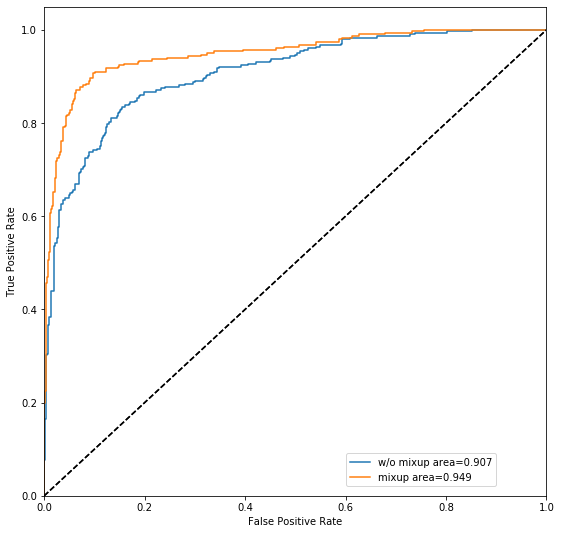

r2plus1d18_datas_img128_bs16_s64_nocolor_mixup


In [18]:
plot_mixup_in_one_roc(gt,preds_dense_mixup, 'dense_mixup', 9)
plot_mixup_in_one_roc(gt,preds_mc_mixup, 'mc_mixup', 9)
plot_mixup_in_one_roc(gt,preds_res18_mixup, 'res18_mixup', 9)
plot_mixup_in_one_roc(gt,preds_res101_mixup, 'res101_mixup', 9)
plot_mixup_in_one_roc(gt,preds_r2_mixup, 'r2_mixup', 9)

In [3]:
59164+14471

73635

# AutoML

In [17]:
def plot_mixup_in_one_roc(gt, preds, title='', size_scale=5, fontsize=14):
    figsize = (1*size_scale,1*size_scale)
    fig, axes = plt.subplots(1,figsize=figsize)
    ax = axes
    fpr = {}
    tpr = {}
    roc_auc = {}
    gt_onehot = np.eye(3)[gt]
    for idx in range(len(preds)):
        fullname = list(preds.keys())[idx]
        pred = preds[fullname]
        for i in range(3):
            fpr[i],tpr[i],_ = metrics.roc_curve(gt_onehot[:,i],pred[:,i])
            roc_auc[i] = metrics.auc(fpr[i], tpr[i])

        cls_map = {'0':'CP','1':'NCP','2':'Normal'}
        i=1
        name=fullname
        n_slice = fullname.split('_')[-1].replace('s','slice=')
        ax.plot(fpr[i], tpr[i], label=f"{name} area={roc_auc[i]:.3f}")
#         ax.plot(fpr[i], tpr[i], label=f"ROC curve of  {name} (area={roc_auc[i]:.2f})")
        ax.plot([0, 1], [0, 1], 'k--')
        # plt.grid()
        ax.set_xlim([0.0, 1.0])
        ax.set_ylim([0.0, 1.05])
        ax.set_xlabel('False Positive Rate')
        ax.set_ylabel('True Positive Rate')
        ax.legend(loc=(0.6,0.02))
        # plt.tight_layout()
#         ax.set_title(name)
    plt.show()
    print(fullname)

In [4]:
gt1 = './size12.34_acc87.12/gt_labels.npy'
base = './size12.34_acc87.12/predictions.npy'

gt2 = './size22.91_acc87.14/gt_labels.npy'
deeper = './size22.91_acc87.14/predictions.npy'

In [7]:
yt1 = np.load(gt1)
yt2 = np.load(gt2)
sum(yt1-yt2)

0

In [8]:
ypb = np.load(base)
ypd = np.load(deeper)

In [9]:
print(imblearn.metrics.classification_report_imbalanced(yt1, ypb.argmax(1),digits=4))

                   pre       rec       spe        f1       geo       iba       sup

          0     0.8807    0.8284    0.9313    0.8537    0.8783    0.7635       303
          1     0.8552    0.8411    0.9133    0.8481    0.8764    0.7626       302
          2     0.8009    0.8964    0.9289    0.8460    0.9125    0.8300       193

avg / total     0.8518    0.8496    0.9239    0.8497    0.8859    0.7792       798



In [12]:
metrics.accuracy_score(yt1, ypb.argmax(1))

0.849624060150376

In [10]:
print(imblearn.metrics.classification_report_imbalanced(yt1, ypd.argmax(1),digits=4))

                   pre       rec       spe        f1       geo       iba       sup

          0     0.8717    0.8746    0.9212    0.8731    0.8976    0.8019       303
          1     0.8844    0.8609    0.9315    0.8725    0.8955    0.7963       302
          2     0.8450    0.8756    0.9488    0.8601    0.9115    0.8247       193

avg / total     0.8700    0.8697    0.9317    0.8697    0.9002    0.8053       798



In [11]:
metrics.accuracy_score(yt1, ypd.argmax(1))

0.8696741854636592

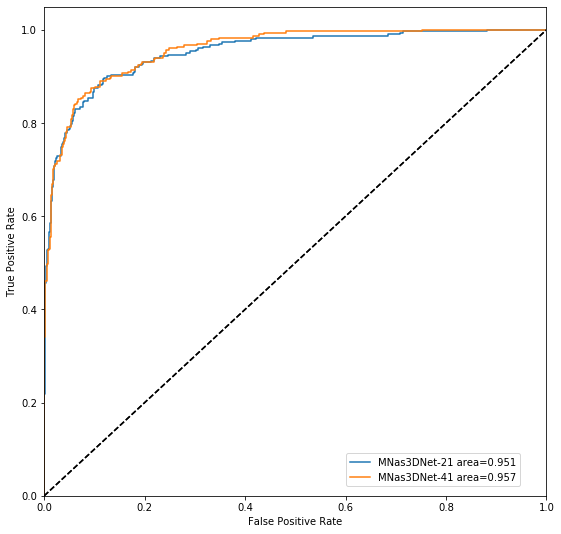

MNas3DNet-41


In [18]:
plot_mixup_in_one_roc(yt1,{'MNas3DNet-21':ypb,'MNas3DNet-41':ypd}, 'dense_mixup', 9)